In [1]:
# pip install spatialmath-python
# pip install roboticstoolbox-python

from spatialmath import *
from roboticstoolbox import *

import numpy as np
import matplotlib.pyplot as plt


#### Obtenga el modelo de un robot diferencial con ruedas de radio R1 y R2


In [2]:

def simulate_kinetic_model(
        t_range = [0, 30],
        delta_t = 0.05,
        x_init = 0.0,
        y_init = 0.0,
        theta_init = 0.0,
        controls_f = None,
        model_f = None):
    t_init, t_end = t_range
    i_T_r = SE2(x=x_init, y=y_init, theta=theta_init)

    t_values = []
    x_values = []
    y_values = []
    tita_values = []

    current_t = t_init
    while current_t < t_end:
        t_values.append(current_t)
        x_values.append(i_T_r.x)
        y_values.append(i_T_r.y)
        tita_values.append(i_T_r.theta())

        # get the control input for the current time
        controls = controls_f(current_t, i_T_r.x, i_T_r.y, i_T_r.theta())
        # Calculate the body velocities from the control inputs
        vx_r, vy_r, w_r = model_f(**controls)

        # Calculate the relative motion of the robot for the simulation interval
        DeltaTr = SE2(x=vx_r * delta_t, y=vy_r * delta_t, theta=w_r * delta_t)
        # Update the state of the robot
        i_T_r = i_T_r * DeltaTr

        current_t += delta_t

    return t_values, x_values, y_values, tita_values


In [3]:
def controls_straight(t, x, y, tita):
    return {
        'w1': 0.1,
        'w2': 0.1
    }

def controls_pure_rotation_ccw(t, x, y, tita):
    return {
        'w1': 0.1,
        'w2': -0.1
    }

def controls_circular_motion(t, x, y, tita):
    return {
        'w1': 1.0,
        'w2': 2.0
    }


La función siguiente construye un modelo cinemático para un robot diferencial con ruedas de radio R1 y R2, y distancia entre ruedas L. 

In [4]:

def build_diff_drive_model(r1 = 0.2, r2 = 0.2, L = 0.5):
    def model_f(w1, w2):
        J = np.array([
            [1.0, 0.0, L/2.0], 
            [1.0, 0.0, -L/2.0], 
            [0.0, 1.0, 0.0],
        ])
        C = np.array([
            [r1/2.0 * w1],
            [r2/2.0 * w2],
            [0.0],
        ])
        d_epsilon = (np.linalg.inv(J) @ C)[:,0]
        vx_r = d_epsilon[0]
        vy_r = d_epsilon[1]
        w_r = d_epsilon[2]
        return vx_r, vy_r, w_r
    return model_f


#### Diff drive con ruedas de radios iguales

In [5]:
symmetric_diff_drive_model = build_diff_drive_model(r1=0.2, r2=0.2, L=0.5)

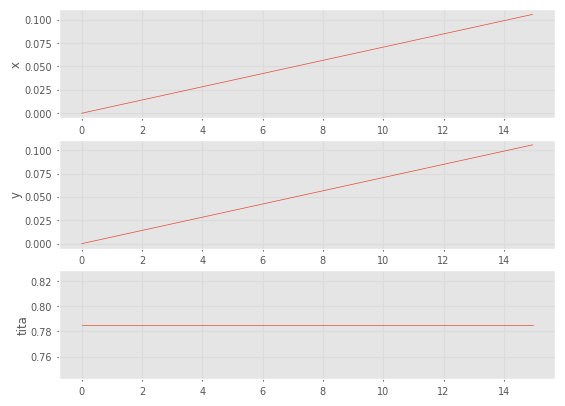

In [6]:
# Movimiento en linea recta 

t_values, x_values, y_values, tita_values = simulate_kinetic_model(
    t_range=[0, 15],
    delta_t=0.05,
    x_init=0.0,
    y_init=0.0,
    theta_init=np.deg2rad(45),
    controls_f=controls_straight,
    model_f=symmetric_diff_drive_model)

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(t_values, x_values)
ax1.set(ylabel='x')
ax2.plot(t_values, y_values)
ax2.set(ylabel='y')
ax3.plot(t_values, tita_values)
ax3.set(ylabel='tita')
plt.show()

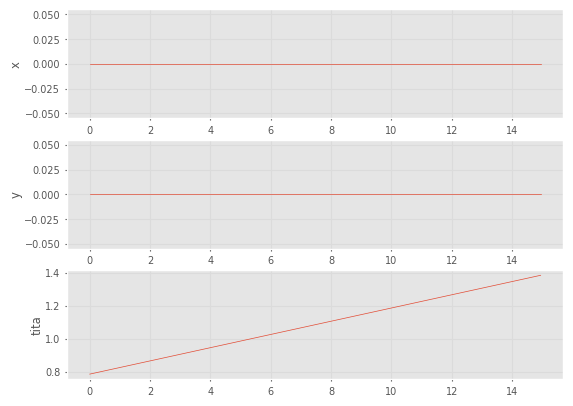

In [7]:
# Giro puro en sentido horario

t_values, x_values, y_values, tita_values = simulate_kinetic_model(
    t_range=[0, 15],
    delta_t=0.05,
    x_init=0.0,
    y_init=0.0,
    theta_init=np.deg2rad(45),
    controls_f=controls_pure_rotation_ccw,
    model_f=symmetric_diff_drive_model)

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(t_values, x_values)
ax1.set(ylabel='x')
ax2.plot(t_values, y_values)
ax2.set(ylabel='y')
ax3.plot(t_values, tita_values)
ax3.set(ylabel='tita')
plt.show()

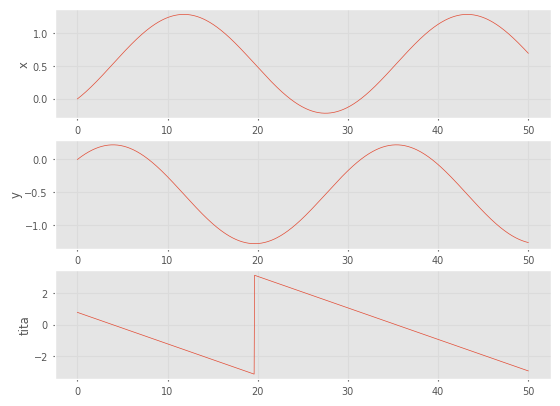

In [8]:
# Movimiento circular

t_values, x_values, y_values, tita_values = simulate_kinetic_model(
    t_range=[0, 50],
    delta_t=0.05,
    x_init=0.0,
    y_init=0.0,
    theta_init=np.deg2rad(45),
    controls_f=controls_circular_motion,
    model_f=symmetric_diff_drive_model)

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(t_values, x_values)
ax1.set(ylabel='x')
ax2.plot(t_values, y_values)
ax2.set(ylabel='y')
ax3.plot(t_values, tita_values)
ax3.set(ylabel='tita')
plt.show()

#### Diff drive con ruedas de radios diferentes (differencia 10%)

Debido a la diferencia de radios, los comportamientos se apartan del modelo ideal de un robot diferencial. En este caso, el robot no se desplaza en línea recta cuando las ruedas giran a la misma velocidad, sino que el robot se desplaza en una trayectoria curva, y para un velocidades angulares iguales y opuestas el robot no gira en su propio eje, sino que se desplaza en una trayectoria circular.

In [9]:
asymmetric_diff_drive_model = build_diff_drive_model(r1=0.2, r2=0.22, L=0.5)

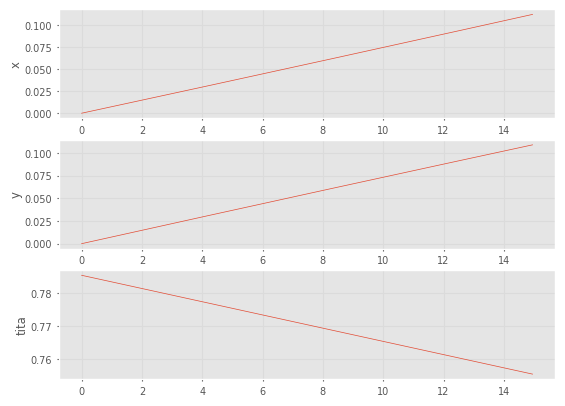

In [10]:
# Movimiento en linea recta 

t_values, x_values, y_values, tita_values = simulate_kinetic_model(
    t_range=[0, 15],
    delta_t=0.05,
    x_init=0.0,
    y_init=0.0,
    theta_init=np.deg2rad(45),
    controls_f=controls_straight,
    model_f=asymmetric_diff_drive_model)

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(t_values, x_values)
ax1.set(ylabel='x')
ax2.plot(t_values, y_values)
ax2.set(ylabel='y')
ax3.plot(t_values, tita_values)
ax3.set(ylabel='tita')
plt.show()

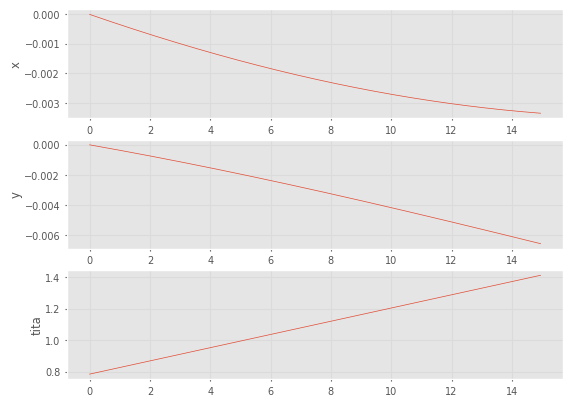

In [11]:
# Giro puro en sentido horario

t_values, x_values, y_values, tita_values = simulate_kinetic_model(
    t_range=[0, 15],
    delta_t=0.05,
    x_init=0.0,
    y_init=0.0,
    theta_init=np.deg2rad(45),
    controls_f=controls_pure_rotation_ccw,
    model_f=asymmetric_diff_drive_model)

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(t_values, x_values)
ax1.set(ylabel='x')
ax2.plot(t_values, y_values)
ax2.set(ylabel='y')
ax3.plot(t_values, tita_values)
ax3.set(ylabel='tita')
plt.show()

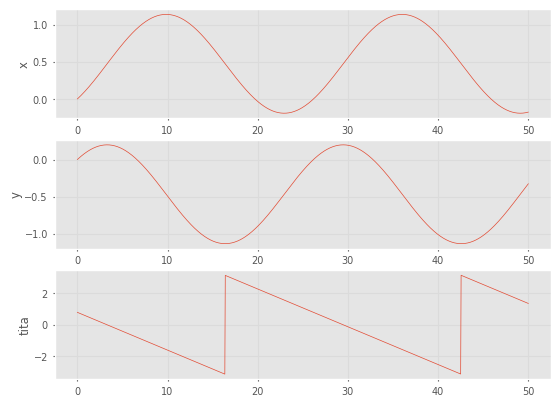

In [12]:
# Movimiento circular

t_values, x_values, y_values, tita_values = simulate_kinetic_model(
    t_range=[0, 50],
    delta_t=0.05,
    x_init=0.0,
    y_init=0.0,
    theta_init=np.deg2rad(45),
    controls_f=controls_circular_motion,
    model_f=asymmetric_diff_drive_model)

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(t_values, x_values)
ax1.set(ylabel='x')
ax2.plot(t_values, y_values)
ax2.set(ylabel='y')
ax3.plot(t_values, tita_values)
ax3.set(ylabel='tita')
plt.show()

#### Control de posición de un robot diferencial

Control proporcional simple para llevar el robot a una posición deseada.

[Text(0, 0.5, 'tita')]

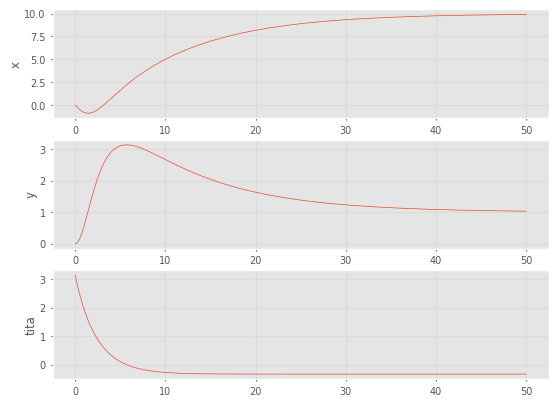

In [13]:
def build_position_control(target_x, target_y):
    Kw = 0.5
    Kd = 0.1

    # para no hacer la conversión ida y vuelta a velocidades de ruedas, el control devuelve directamente v y w y uso
    # un modelo simplificado que no simplemente convierte v y w a vx, vy y W
   
    def position_controller(t, x, y, tita):
        distance_error = np.sqrt((target_x - x)**2 + (target_y - y)**2)
        angle_error = np.arctan2(target_y - y, target_x - x) - tita
        angle_error = np.arctan2(np.sin(angle_error), np.cos(angle_error)) # reducir al rango [-pi, pi]
        w = Kw * angle_error
        v = Kd * distance_error
        return {
            'v' : v,
            'w' : w
        }

    def simplified_model_f(v, w):
        return v, 0.0, w
    
    return position_controller, simplified_model_f

goal_x = 10.0
goal_y = 1.0
position_controller, simplified_model_f = build_position_control(goal_x, goal_y)

t_values, x_values, y_values, tita_values = simulate_kinetic_model(
    t_range=[0, 50],
    delta_t=0.05,
    x_init=0.0,
    y_init=0.0,
    theta_init=np.deg2rad(180),
    controls_f=position_controller,
    model_f=simplified_model_f)

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(t_values, x_values)
ax1.set(ylabel='x')
ax2.plot(t_values, y_values)
ax2.set(ylabel='y')
ax3.plot(t_values, tita_values)
ax3.set(ylabel='tita')

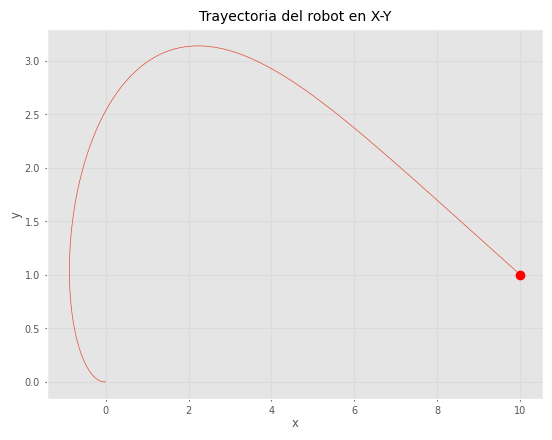

In [14]:
plt.plot(x_values, y_values)
plt.plot(goal_x, goal_y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectoria del robot en X-Y')
plt.show()